<a href="https://colab.research.google.com/github/acubillosunal/UBM-MACHINE-LEARNING-1/blob/main/26-Ejemplo_clasificacion.ipynb#scrollTo=_X3EO4ae3iOX" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras alamancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosunal/UBM-MACHINE-LEARNING-1/main/init.py
import init; init.init(force_download=False); 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos la base de datos que vamos a analizar

In [3]:
xls = pd.ExcelFile('local/data/Dataset.xlsx')
df = pd.read_excel(xls, 'DB')

In [4]:
pd.set_option('display.max_columns', None)
print(df.shape)
df.head()

(19942, 22)


,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id
0,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0,1004369760
1,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0,1004369760
2,NOROCCIDENTE,ANTIOQUIA,HFC,CONTACT,SAC,INDIRECTA,1,1.0,TV,Individual,1.0,No navega,0,0,0,0,0,0,0,0,0,1004371304
3,COSTA,MAGDALENA,HFC,CONTACT,IN BOUND,INDIRECTA,3,7.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,1,1004382867
4,COSTA,MAGDALENA,HFC,CONTACT,IN BOUND,INDIRECTA,3,7.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,1,1004382867


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19942 entries, 0 to 19941
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   REGIONAL                   19942 non-null  object 
 1   DEPARTAMENTO               19942 non-null  object 
 2   TECNOL                     19942 non-null  object 
 3   GERENCIA                   19942 non-null  object 
 4   CANAL_HOMOLOGADO_MILLICON  19942 non-null  object 
 5   tipo_fuerza_venta          19942 non-null  object 
 6   estrato                    19942 non-null  object 
 7   antiguedad_meses           18264 non-null  float64
 8   productos                  19942 non-null  object 
 9   portafolio                 19942 non-null  object 
 10  no_serv_tecnicos           6909 non-null   float64
 11  fallo                      6909 non-null   object 
 12  asesoria_factura           19942 non-null  int64  
 13  pedidos_peticiones         19942 non-null  int

Determinemos la cantidad de valores únicos por columna

In [6]:
cols = ['REGIONAL', 'DEPARTAMENTO', 'TECNOL', 'GERENCIA',
        'CANAL_HOMOLOGADO_MILLICON', 'tipo_fuerza_venta', 'estrato',
        'antiguedad_meses', 'productos', 'portafolio', 'no_serv_tecnicos',
        'fallo', 'asesoria_factura', 'pedidos_peticiones', 'reagendamiento',
        'asesoria_servicios', 'retencion', 'Otras', 'quejas_fraude', 'traslado',
        'Incumplimiento_pago']

unique_values = {}

for col in cols:
  unique_values[col] = df[col].unique()

unique_values_df = pd.DataFrame.from_dict(unique_values, orient = 'index').transpose()

unique_values_df

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago
0,COSTA,MAGDALENA,HFC,CONTACT,SAC,INDIRECTA,3,19.0,TV+BA,Duo,1.0,No funciona línea telefónica,0,0,0,0,0,0,0,0,0
1,NOROCCIDENTE,ANTIOQUIA,REDCO,TIENDAS,IN BOUND,DIRECTA,1,1.0,TV,Individual,NaN,No navega,1,1,1,1,1,1,1,1,1
2,EJE CAFETERO,RISARALDA,GPON,FVD,TIENDAS,None,SE,7.0,TO+TV+BA,Trio,None,NaN,None,None,None,None,None,None,None,None,None
3,ORIENTE,BOYACA,DTH,AUR&CONSTRUCTORES,FVD,None,4,NaN,TO+BA,None,None,Servicio intermitente,None,None,None,None,None,None,None,None,None
4,CENTRO,CUNDINAMARCA,None,RETAIL,DEALERS,None,2,0.0,BA,None,None,Sin señal,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,335.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,275.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df[df['antiguedad_meses'] == 255.0]

,REGIONAL,DEPARTAMENTO,TECNOL,GERENCIA,CANAL_HOMOLOGADO_MILLICON,tipo_fuerza_venta,estrato,antiguedad_meses,productos,portafolio,no_serv_tecnicos,fallo,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id
14098,EJE CAFETERO,CALDAS,HFC,TIENDAS,TIENDAS,INDIRECTA,4,255.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,0,4557949
14099,EJE CAFETERO,CALDAS,HFC,TIENDAS,TIENDAS,INDIRECTA,4,255.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,0,4557949
14100,EJE CAFETERO,CALDAS,HFC,TIENDAS,TIENDAS,INDIRECTA,4,255.0,TO+TV+BA,Trio,NaN,NaN,0,0,0,0,0,0,0,0,0,4557949


In [8]:
df['estrato'] = df['estrato'].replace('SE', np.nan)
df['estrato'] = df['estrato'].fillna(df['estrato'].mode()[0])
df['no_serv_tecnicos'] = df['no_serv_tecnicos'].fillna(0.0)
df['fallo'] = df['fallo'].fillna('Sin fallo')
df['DEPARTAMENTO'] = df['DEPARTAMENTO'].replace('ATLÁNTICO', 'ATLANTICO')

In [9]:
target_departments = ['ANTIOQUIA', 'CUNDINAMARCA', 'VALLE DEL CAUCA', 'BOLIVAR', 'SANTANDER', 'CALDAS', 'CORDOBA',
                      'CESAR', 'ATLANTICO', 'QUINDIO']

df['DEPARTAMENTO_NEW'] = df['DEPARTAMENTO'].apply(lambda x: x if x in target_departments else "OTROS")

target_fallo = ['Sin fallo', 'No navega', 'Sin señal', 'Servicio intermitente']

df['fallo_new'] = df['fallo'].apply(lambda x: x if x in target_fallo else "otros")

df = df.drop(['DEPARTAMENTO', 'fallo'], axis = 1)

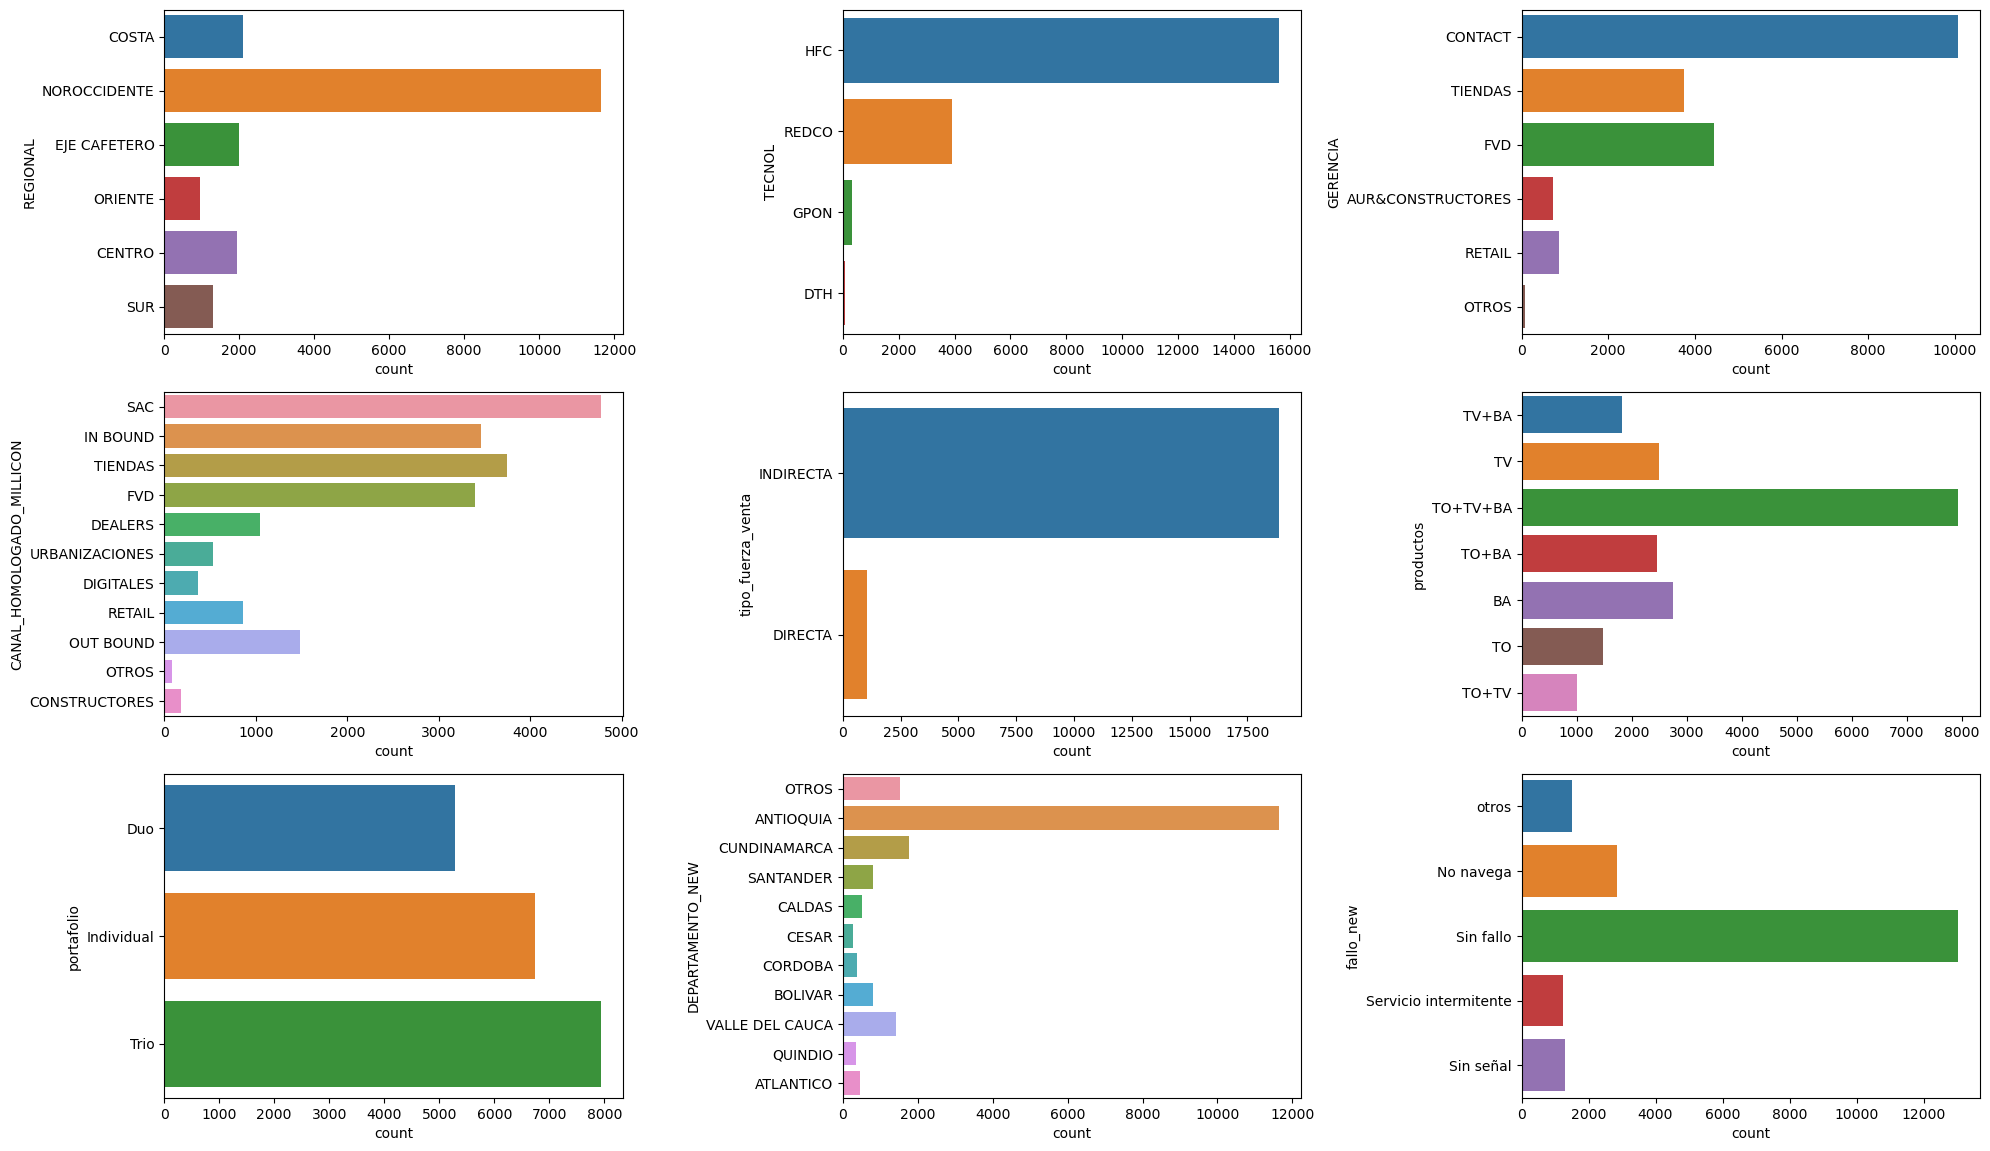

In [10]:
categorical_variables = df.select_dtypes(include = ['object']).columns

plt.figure(figsize=(20, 15))

for i, var in enumerate(categorical_variables):
    plt.subplot(4, 3, i+1)
    sns.countplot(y=var, data=df)

plt.tight_layout()

plt.show()


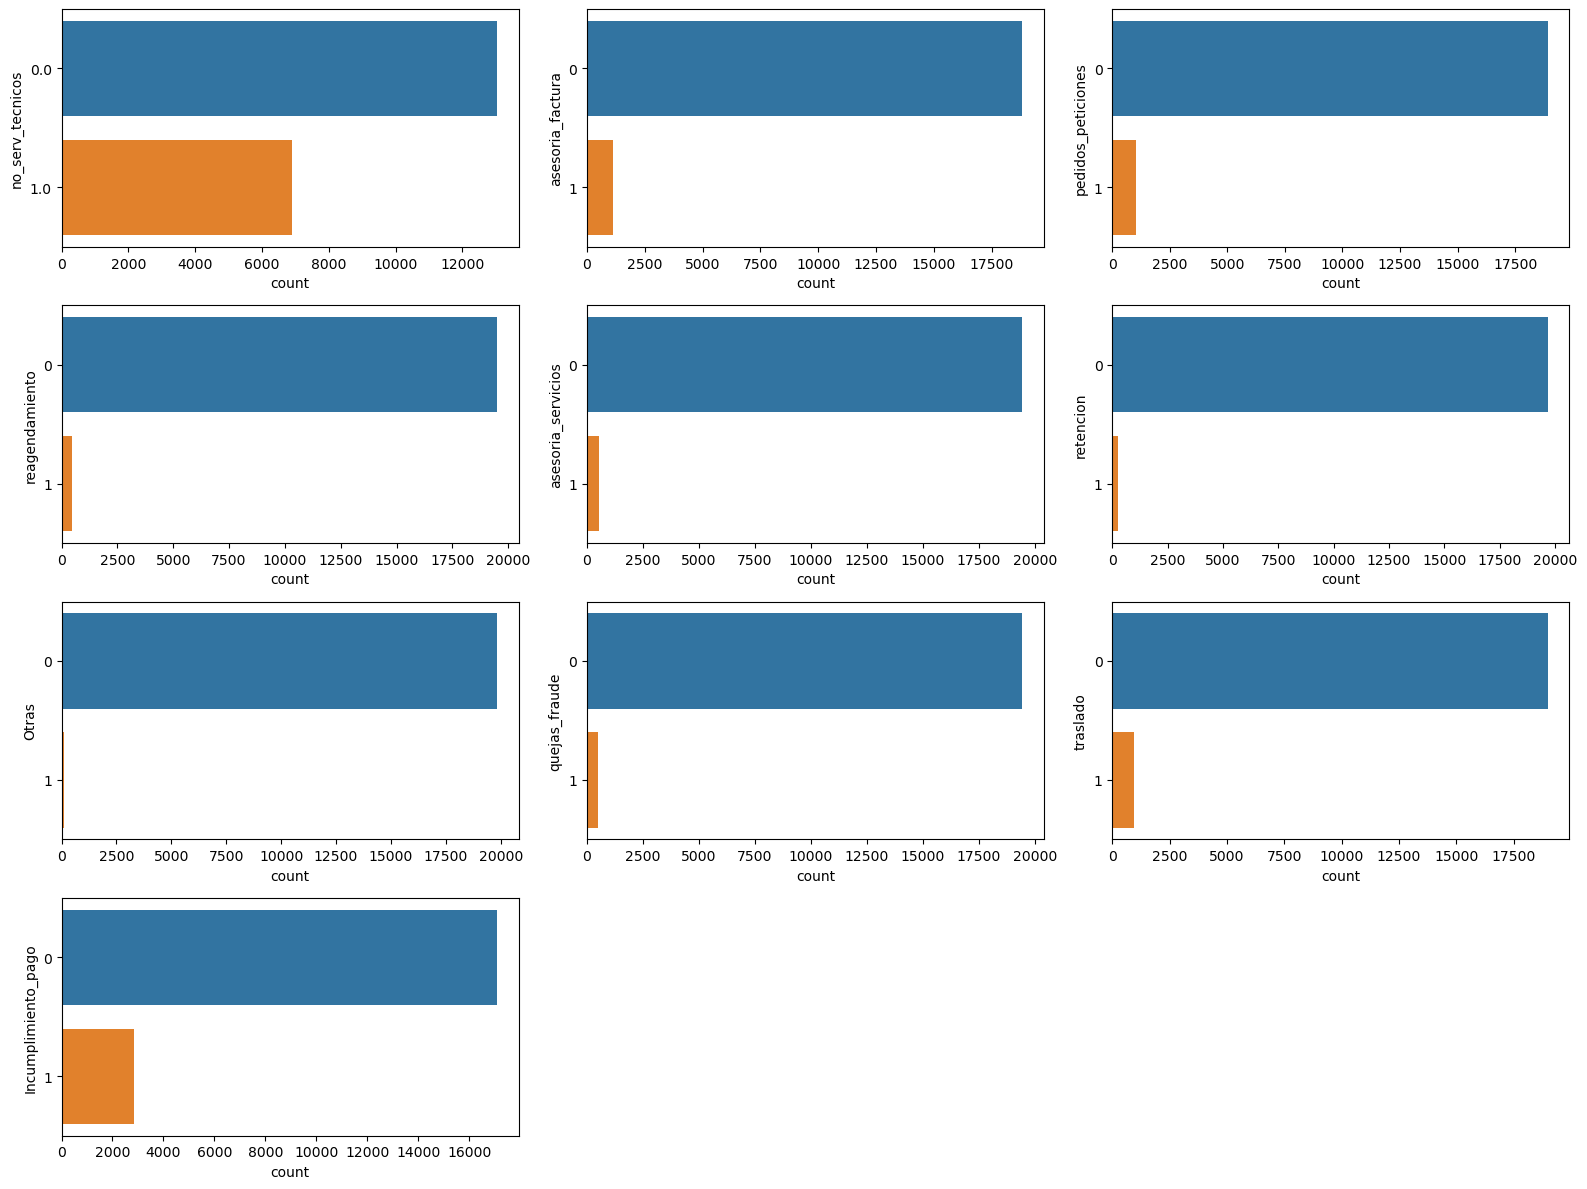

In [11]:
plt.figure(figsize=(16,12))

cat_vars = ['no_serv_tecnicos', 'asesoria_factura',
            'pedidos_peticiones', 'reagendamiento', 'asesoria_servicios',
            'retencion', 'Otras', 'quejas_fraude', 'traslado',
            'Incumplimiento_pago']

for i, var in enumerate(cat_vars):
    plt.subplot(4, 3, i+1)
    sns.countplot(y=var, data=df)

plt.tight_layout()

plt.show()

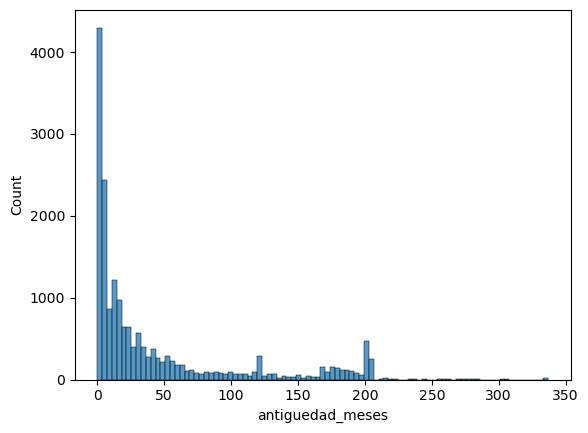

In [12]:
sns.histplot(x = 'antiguedad_meses', data = df);

In [13]:
df_dummies = pd.get_dummies(df)
df_dummies.shape

(19942, 68)

In [14]:
df_dummies

,estrato,antiguedad_meses,no_serv_tecnicos,asesoria_factura,pedidos_peticiones,reagendamiento,asesoria_servicios,retencion,Otras,quejas_fraude,traslado,Incumplimiento_pago,cliente_id,REGIONAL_CENTRO,REGIONAL_COSTA,REGIONAL_EJE CAFETERO,REGIONAL_NOROCCIDENTE,REGIONAL_ORIENTE,REGIONAL_SUR,TECNOL_DTH,TECNOL_GPON,TECNOL_HFC,TECNOL_REDCO,GERENCIA_AUR&CONSTRUCTORES,GERENCIA_CONTACT,GERENCIA_FVD,GERENCIA_OTROS,GERENCIA_RETAIL,GERENCIA_TIENDAS,CANAL_HOMOLOGADO_MILLICON_CONSTRUCTORES,CANAL_HOMOLOGADO_MILLICON_DEALERS,CANAL_HOMOLOGADO_MILLICON_DIGITALES,CANAL_HOMOLOGADO_MILLICON_FVD,CANAL_HOMOLOGADO_MILLICON_IN BOUND,CANAL_HOMOLOGADO_MILLICON_OTROS,CANAL_HOMOLOGADO_MILLICON_OUT BOUND,CANAL_HOMOLOGADO_MILLICON_RETAIL,CANAL_HOMOLOGADO_MILLICON_SAC,CANAL_HOMOLOGADO_MILLICON_TIENDAS,CANAL_HOMOLOGADO_MILLICON_URBANIZACIONES,tipo_fuerza_venta_DIRECTA,tipo_fuerza_venta_INDIRECTA,productos_BA,productos_TO,productos_TO+BA,productos_TO+TV,productos_TO+TV+BA,productos_TV,productos_TV+BA,portafolio_Duo,portafolio_Individual,portafolio_Trio,DEPARTAMENTO_NEW_ANTIOQUIA,DEPARTAMENTO_NEW_ATLANTICO,DEPARTAMENTO_NEW_BOLIVAR,DEPARTAMENTO_NEW_CALDAS,DEPARTAMENTO_NEW_CESAR,DEPARTAMENTO_NEW_CORDOBA,DEPARTAMENTO_NEW_CUNDINAMARCA,DEPARTAMENTO_NEW_OTROS,DEPARTAMENTO_NEW_QUINDIO,DEPARTAMENTO_NEW_SANTANDER,DEPARTAMENTO_NEW_VALLE DEL CAUCA,fallo_new_No navega,fallo_new_Servicio intermitente,fallo_new_Sin fallo,fallo_new_Sin señal,fallo_new_otros
0,3.0,19.0,1.0,0,0,0,0,0,0,0,0,0,1004369760,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,3.0,19.0,1.0,0,0,0,0,0,0,0,0,0,1004369760,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,1.0,1.0,1.0,0,0,0,0,0,0,0,0,0,1004371304,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,3.0,7.0,0.0,0,0,0,0,0,0,0,0,1,1004382867,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
4,3.0,7.0,0.0,0,0,0,0,0,0,0,0,1,1004382867,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19937,2.0,NaN,0.0,0,0,0,0,0,0,0,0,1,98589757,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19938,2.0,NaN,0.0,0,0,0,0,0,0,0,0,1,98589757,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19939,2.0,89.0,1.0,0,0,0,0,0,0,0,0,0,98590638,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
19940,2.0,36.0,0.0,0,1,0,0,0,0,0,0,0,98591843,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [15]:
df_dummies = df_dummies.dropna()

X = df_dummies.drop(['cliente_id', 'Incumplimiento_pago'], axis = 1)
#X = df_dummies.drop(['cliente_id', 'Incumplimiento_pago'], axis = 1)
y = df_dummies['Incumplimiento_pago']

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [19]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12784, 66), (5480, 66), (12784,), (5480,))

### **Técnicas de Balanceo**
Ya que los valores BD están desbalanceados, en particular la variable target, está altamente desbalanceada, vamos a aplicar algunas técnicas de balanceo.

In [20]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, SMOTENC
from imblearn.combine import SMOTETomek, SMOTEENN

from collections import Counter

RUS = RandomUnderSampler()
SMOTE = SMOTE()
#SMOTENC = SMOTENC()
SMOTETomek = SMOTETomek()
SMOTEENN = SMOTEENN()

#Apliquemos las técnicas de balanceo

X_train_rus, y_train_rus = RUS.fit_resample(X_train, y_train)
X_train_smote, y_train_smote = SMOTE.fit_resample(X_train, y_train)
X_train_smotetomek, y_train_smotetomek = SMOTETomek.fit_resample(X_train, y_train)
X_train_smoteenn, y_train_smoteenn = SMOTEENN.fit_resample(X_train, y_train)

print(f'Cantida de datos originales para cada etiqueta: {Counter(y_train)}')
print(f'Cantida de datos aplicando RUS para cada etiqueta: {Counter(y_train_rus)}')
print(f'Cantida de datos aplicando SMOTE para cada etiqueta: {Counter(y_train_smote)}')
print(f'Cantida de datos aplicando SMOTETomek para cada etiqueta: {Counter(y_train_smotetomek)}')
print(f'Cantida de datos aplicando SMOTEENN para cada etiqueta: {Counter(y_train_smoteenn)}')

Cantida de datos originales para cada etiqueta: Counter({0: 10957, 1: 1827})
Cantida de datos aplicando RUS para cada etiqueta: Counter({0: 1827, 1: 1827})
Cantida de datos aplicando SMOTE para cada etiqueta: Counter({0: 10957, 1: 10957})
Cantida de datos aplicando SMOTETomek para cada etiqueta: Counter({0: 10953, 1: 10953})
Cantida de datos aplicando SMOTEENN para cada etiqueta: Counter({1: 9689, 0: 7945})


<Axes: xlabel='Incumplimiento_pago', ylabel='count'>

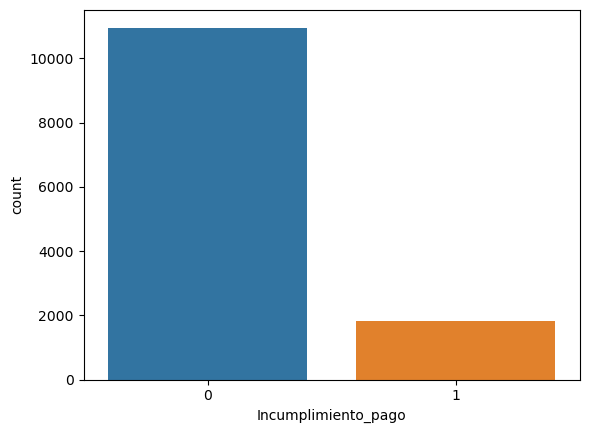

In [21]:
sns.countplot(x = y_train)


<Axes: xlabel='Incumplimiento_pago', ylabel='count'>

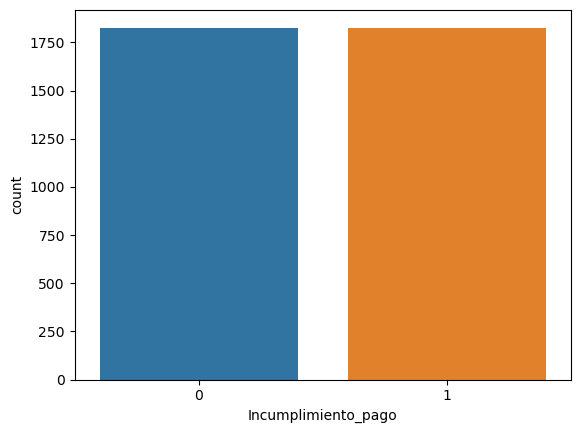

In [22]:
sns.countplot(x = y_train_rus)

Entrenamos el modelo con los conjuntos de entrenamiento sin balancear y con las técnicas de balanceo aplicadas previamente.

### **Entrenamiento con el Modelo de regresión Logística**

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

#Sin balancear
model = lr.fit(X_train, y_train)
model_pred = model.predict(X_test)

#RUS
model_rus = lr.fit(X_train_rus, y_train_rus)
model_pred_rus = model_rus.predict(X_test)

#SMOTE
model_smote = lr.fit(X_train_smote, y_train_smote)
model_pred_smote = model_smote.predict(X_test)

#SMOTETomek
model_smotetomek = lr.fit(X_train_smotetomek, y_train_smotetomek)
model_pred_smotetomek = model_smotetomek.predict(X_test)

#SMOTEENN
model_smoteenn = lr.fit(X_train_smoteenn, y_train_smoteenn)
model_pred_smoteenn = model_smoteenn.predict(X_test)

#Class_weight
model_weight = LogisticRegression(class_weight = {1:4}).fit(X_train, y_train)
model_pred_weight = model_weight.predict(X_test)

/home/proci/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/proci/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

In [24]:
model_pred_df = pd.DataFrame(model_pred)
model_pred_df.rename(columns={0: "Prediction"}, inplace=True)
y_test = y_test.reset_index().drop('index', axis = 1)
df_prueba = pd.concat([model_pred_df, y_test], axis = 1)
df_prueba


,Prediction,Incumplimiento_pago
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5475,0,0
5476,0,1
5477,0,0
5478,0,0


In [25]:
df_prueba[(df_prueba['Prediction'] == 1) & (df_prueba['Incumplimiento_pago'] == 1)].shape

(18, 2)

### **Métricas de la regresión Logística**

In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, balanced_accuracy_score, roc_curve, auc, roc_auc_score

print('Accuracy = '+str(accuracy_score(y_test, model_pred)))
print('Precision = '+str(precision_score(y_test, model_pred)))
print('Recall = '+str(recall_score(y_test, model_pred)))
print('F_1 = '+str(f1_score(y_test, model_pred)))
print('MCC = '+str(matthews_corrcoef(y_test, model_pred)))
print('BACC = '+str(balanced_accuracy_score(y_test, model_pred)))
print('AUC = '+str(roc_auc_score(y_test, model_pred)))
print('--------------------------------------------------------')
print('Accuracy = '+str(accuracy_score(y_test, model_pred_rus)))
print('Precision = '+str(precision_score(y_test, model_pred_rus)))
print('Recall = '+str(recall_score(y_test, model_pred_rus)))
print('F_1 = '+str(f1_score(y_test, model_pred_rus)))
print('MCC = '+str(matthews_corrcoef(y_test, model_pred_rus)))
print('BACC = '+str(balanced_accuracy_score(y_test, model_pred_rus)))
print('AUC = '+str(roc_auc_score(y_test, model_pred_rus)))
print('---------------------------------------------------------')
print('Accuracy = '+str(accuracy_score(y_test, model_pred_weight)))
print('Precision = '+str(precision_score(y_test, model_pred_weight)))
print('Recall = '+str(recall_score(y_test, model_pred_weight)))
print('F_1 = '+str(f1_score(y_test, model_pred_weight)))
print('MCC = '+str(matthews_corrcoef(y_test, model_pred_weight)))
print('BACC = '+str(balanced_accuracy_score(y_test, model_pred_weight)))
print('AUC = '+str(roc_auc_score(y_test, model_pred_weight)))

Accuracy = 0.8563868613138687
Precision = 0.45
Recall = 0.022988505747126436
F_1 = 0.04374240583232077
MCC = 0.07525294501657144
BACC = 0.5091523324988559
AUC = 0.5091523324988559
--------------------------------------------------------
Accuracy = 0.6644160583941606
Precision = 0.2544186046511628
Recall = 0.698595146871009
F_1 = 0.3729969314694852
MCC = 0.25609388724596743
BACC = 0.6786567388602437
AUC = 0.6786567388602437
---------------------------------------------------------
Accuracy = 0.7594890510948905
Precision = 0.312280701754386
Recall = 0.5683269476372924
F_1 = 0.40307971014492755
MCC = 0.28695141553025894
BACC = 0.6798415662180501
AUC = 0.6798415662180501


### **Modelo s Discriminantes Gaussianos**

In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

clf1 = LinearDiscriminantAnalysis()
clf1.fit(X_train, y_train)
clf1_pred = clf1.predict(X_test)
clf2 = GaussianNB()
clf2.fit(X_train, y_train)
clf2_pred = clf2.predict(X_test)
clf3 = QuadraticDiscriminantAnalysis()
clf3.fit(X_train, y_train)
clf3_pred = clf3.predict(X_test)

/home/proci/anaconda3/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [28]:
clf2_pred_df = pd.DataFrame(clf2_pred)
clf2_pred_df.rename(columns={0: "Prediction"}, inplace=True)
y_test = y_test.reset_index().drop('index', axis = 1)
df_prueba = pd.concat([clf2_pred_df, y_test], axis = 1)
df_prueba

,Prediction,Incumplimiento_pago
0,0,0
1,1,0
2,0,0
3,0,0
4,0,0
...,...,...
5475,0,0
5476,1,1
5477,0,0
5478,1,0


In [29]:
df_prueba[(df_prueba['Prediction'] == 1) & (df_prueba['Incumplimiento_pago'] == 1)].shape

(520, 2)

### **Aplicación de Modelos no-paramétricos**

In [41]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

model_knn = knn.fit(X_train, y_train)
model_knn_pred = model_knn.predict(X_test)

### **Métricas para los discriminantes Gaussianos y Modelos no-paramétricos**

In [30]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, balanced_accuracy_score

print('Accuracy clf1 = '+str(accuracy_score(y_test, clf1_pred)))
print('Precision clf1 = '+str(precision_score(y_test, clf1_pred)))
print('Recall clf1 = '+str(recall_score(y_test, clf1_pred)))
print('F_1 clf1 = '+str(f1_score(y_test, clf1_pred)))
print('MCC clf1 = '+str(matthews_corrcoef(y_test, clf1_pred)))
print('BACC clf1 = '+str(balanced_accuracy_score(y_test, clf1_pred)))

Accuracy clf1 = 0.8576642335766423
Precision clf1 = 0.5205479452054794
Recall clf1 = 0.04853128991060025
F_1 clf1 = 0.08878504672897194
MCC clf1 = 0.12539466939986918
BACC clf1 = 0.5205398625409932


In [31]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, balanced_accuracy_score

print('Accuracy clf2 = '+str(accuracy_score(y_test, clf2_pred)))
print('Precision clf2 = '+str(precision_score(y_test, clf2_pred)))
print('Recall clf2 = '+str(recall_score(y_test, clf2_pred)))
print('F_1 clf2 = '+str(f1_score(y_test, clf2_pred)))
print('MCC clf2 = '+str(matthews_corrcoef(y_test, clf2_pred)))
print('BACC clf2 = '+str(balanced_accuracy_score(y_test, clf2_pred)))

Accuracy clf2 = 0.6841240875912409
Precision clf2 = 0.26156941649899396
Recall clf2 = 0.6641123882503193
F_1 clf2 = 0.3753157704799711
MCC clf2 = 0.2558943592297783
BACC clf2 = 0.6757862345765115


In [32]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, matthews_corrcoef, balanced_accuracy_score

print('Accuracy clf3 = '+str(accuracy_score(y_test, clf3_pred)))
print('Precision clf3 = '+str(precision_score(y_test, clf3_pred)))
print('Recall clf3 = '+str(recall_score(y_test, clf3_pred)))
print('F_1 clf3 = '+str(f1_score(y_test, clf3_pred)))
print('MCC clf3 = '+str(matthews_corrcoef(y_test, clf3_pred)))
print('BACC clf3 = '+str(balanced_accuracy_score(y_test, clf3_pred)))

Accuracy clf3 = 0.19197080291970803
Precision clf3 = 0.1482339316734221
Recall clf3 = 0.9808429118773946
F_1 clf3 = 0.25754527162977864
MCC clf3 = 0.0636462505476812
BACC clf3 = 0.5206535189576456


In [ ]:
df = df.dropna()
numerical_variables = df.select_dtypes(include = ['int', 'float']).columns
X = df[numerical_variables].drop(['cliente_id', 'Incumplimiento_pago'], axis = 1)
#X = df.drop(['cliente_id', 'Incumplimiento_pago'], axis = 1)
y = df['Incumplimiento_pago']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12784, 11), (5480, 11), (12784,), (5480,))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

model = lr.fit(X_train, y_train)
model_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
y_train.value_counts(normalize=True)

0    0.857087
1    0.142913
Name: Incumplimiento_pago, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.857117
1    0.142883
Name: Incumplimiento_pago, dtype: float64

In [ ]:
model_pred_df = pd.DataFrame(model_pred)
model_pred_df.rename(columns={0: "Prediction"}, inplace=True)
y_test = y_test.reset_index().drop('index', axis = 1)
df_prueba = pd.concat([model_pred_df, y_test], axis = 1)
df_prueba


,Prediction,Incumplimiento_pago
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5475,0,0
5476,0,1
5477,0,0
5478,0,0


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

clf1 = LinearDiscriminantAnalysis()
clf1.fit(X_train, y_train)
clf1_pred = clf1.predict(X_test)
clf2 = GaussianNB()
clf2.fit(X_train, y_train)
clf2_pred = clf2.predict(X_test)
clf3 = QuadraticDiscriminantAnalysis()
clf3.fit(X_train, y_train)
clf3_pred = clf3.predict(X_test)

In [ ]:
clf2_pred_df = pd.DataFrame(clf2_pred)
clf2_pred_df.rename(columns={0: "Prediction"}, inplace=True)
y_test = y_test.reset_index().drop('index', axis = 1)
df_prueba = pd.concat([clf2_pred_df, y_test], axis = 1)
df_prueba

,Prediction,Incumplimiento_pago
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5475,0,0
5476,0,1
5477,0,0
5478,0,0


In [ ]:
df_prueba[(df_prueba['Prediction'] == 1) & (df_prueba['Incumplimiento_pago'] == 1)].shape

(26, 2)

In [ ]:
clf3_pred_df = pd.DataFrame(clf3_pred)
clf3_pred_df.rename(columns={0: "Prediction"}, inplace=True)
y_test = y_test.reset_index().drop('index', axis = 1)
df_prueba = pd.concat([clf3_pred_df, y_test], axis = 1)
df_prueba

,Prediction,Incumplimiento_pago
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
5475,0,0
5476,0,1
5477,0,0
5478,0,0


In [ ]:
df_prueba[(df_prueba['Prediction'] == 1) & (df_prueba['Incumplimiento_pago'] == 1)].shape

(22, 2)

### **KFold crooss validation**

In [87]:
X_array = X.values
print(X_array.shape)
y_array = y.values

(18264, 66)


In [89]:
from sklearn.model_selection import KFold

lr = LogisticRegression(max_iter=1000) 

kf = KFold(n_splits = 5)

accuracy_scores = []

for train_index, test_index in kf.split(X_array):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]

    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    accuracy = accuracy_score(y_pred, y_test)
    accuracy_scores.append(accuracy)

average_accuracy = np.mean(accuracy_scores)
print("Average Accuracy:", average_accuracy)

Average Accuracy: 0.8546868558273608


In [90]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into train and test sets for cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []

for train_index, test_index in kf.split(X_array):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]

    # Split the training data into a train set and a validation set
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

        lr = LogisticRegression(max_iter=1000)
        lr.fit(X_train, y_train)

        y_pred = lr.predict(X_test)

        accuracy = accuracy_score(y_pred, y_test)
        accuracy_scores.append(accuracy)

average_accuracy = np.mean(accuracy_scores)
print("Average Accuracy:", average_accuracy)


Average Accuracy: 0.8561648680179743


In [66]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

lr = LogisticRegression(max_iter=1000)

kf = KFold(n_splits=5)

accuracy_scores = []
roc_auc_scores = []

for train_index, test_index in kf.split(X_array):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]

    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    accuracy = accuracy_score(y_pred, y_test)
    accuracy_scores.append(accuracy)

    roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
    roc_auc_scores.append(roc_auc)

average_accuracy = np.mean(accuracy_scores)
average_roc_auc = np.mean(roc_auc_scores)

print("Average Accuracy:", average_accuracy)
print("Average ROC-AUC Score:", average_roc_auc)


Average Accuracy: 0.8546868558273608
Average ROC-AUC Score: 0.7396226809947505


(14611, 66)
(14611,)
(3653,)
(3653,)
(14611, 66)
(14611,)
(3653,)
(3653,)
(14611, 66)
(14611,)
(3653,)
(3653,)
(14611, 66)
(14611,)
(3653,)
(3653,)
(14612, 66)
(14612,)
(3652,)
(3652,)


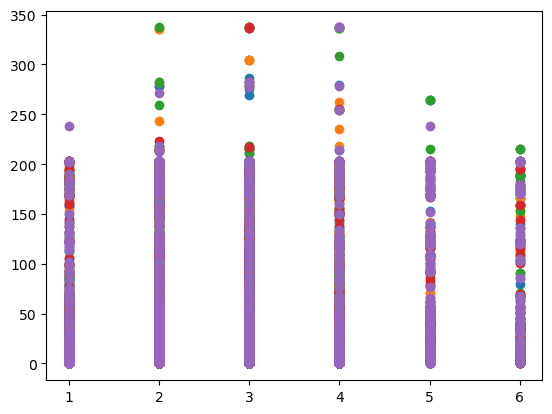

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

lr = LogisticRegression(max_iter=1000)

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Added shuffle and random_state for consistency

accuracy_scores = []
roc_auc_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_array)):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]

    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    print(X_train.shape)
    print(train_index.shape)
    print(X_array[test_index, 0].shape)
    print(X_array[test_index, 1].shape)

    accuracy = accuracy_score(y_pred, y_test)
    accuracy_scores.append(accuracy)

    roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
    roc_auc_scores.append(roc_auc)

    # Plot the data points in each fold
    plt.scatter(X_array[test_index, 0], X_array[test_index, 1], label=f'Fold {fold + 1}')

In [84]:
14611/5

2922.2

Average Accuracy: 0.8566576736730662
Average ROC-AUC Score: 0.7559044769216217


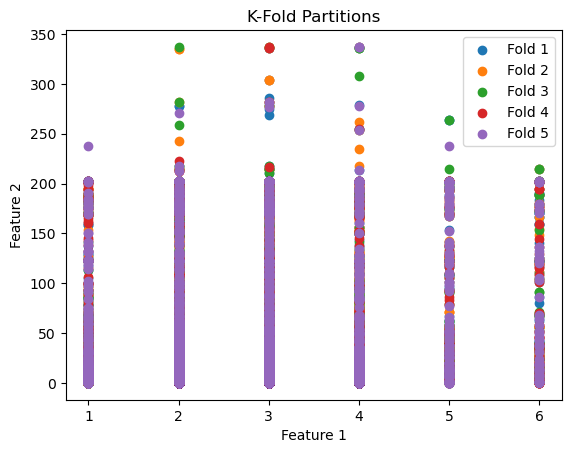

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

lr = LogisticRegression(max_iter=1000)

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # Added shuffle and random_state for consistency

accuracy_scores = []
roc_auc_scores = []

for fold, (train_index, test_index) in enumerate(kf.split(X_array)):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]

    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    accuracy = accuracy_score(y_pred, y_test)
    accuracy_scores.append(accuracy)

    roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
    roc_auc_scores.append(roc_auc)

    # Plot the data points in each fold
    plt.scatter(X_array[test_index, 0], X_array[test_index, 1], label=f'Fold {fold + 1}')

average_accuracy = np.mean(accuracy_scores)
average_roc_auc = np.mean(roc_auc_scores)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("K-Fold Partitions")

print("Average Accuracy:", average_accuracy)
print("Average ROC-AUC Score:", average_roc_auc)
plt.show()


Average Accuracy: 0.8581021897810219
Average ROC-AUC Score: 0.751723327940866


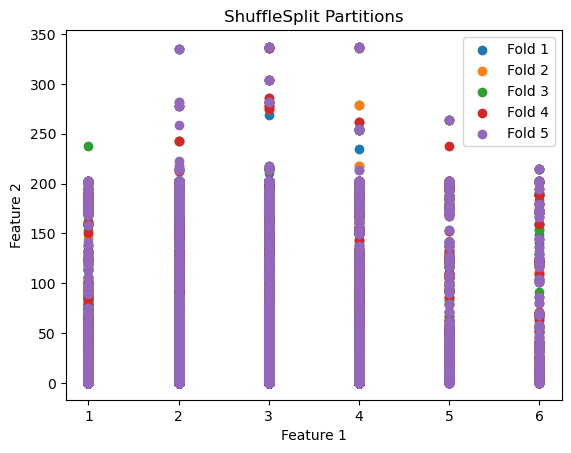

In [80]:
from sklearn.model_selection import ShuffleSplit  # Import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

lr = LogisticRegression(max_iter=1000)

ss = ShuffleSplit(n_splits=5, test_size=0.3, random_state=42)  # Create a ShuffleSplit instance

accuracy_scores = []
roc_auc_scores = []

for fold, (train_index, test_index) in enumerate(ss.split(X_array)):
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]

    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    accuracy = accuracy_score(y_pred, y_test)
    accuracy_scores.append(accuracy)

    roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
    roc_auc_scores.append(roc_auc)

    # Plot the data points in each fold
    plt.scatter(X_array[test_index, 0], X_array[test_index, 1], label=f'Fold {fold + 1}')

average_accuracy = np.mean(accuracy_scores)
average_roc_auc = np.mean(roc_auc_scores)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.title("ShuffleSplit Partitions")

print("Average Accuracy:", average_accuracy)
print("Average ROC-AUC Score:", average_roc_auc)
plt.show()

### **Aplicación StratifiedKFold**

In [81]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

lr = LogisticRegression(max_iter=1000)

stratified_kf = StratifiedKFold(n_splits=5)

accuracy_scores = []
roc_auc_scores = []

for train_index, test_index in stratified_kf.split(X_array, y_array):  # Pass both X_array and y_array to stratified_kf.split
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]

    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    accuracy = accuracy_score(y_pred, y_test)
    accuracy_scores.append(accuracy)

    roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
    roc_auc_scores.append(roc_auc)

average_accuracy = np.mean(accuracy_scores)
average_roc_auc = np.mean(roc_auc_scores)

print("Average Accuracy:", average_accuracy)
print("Average ROC-AUC Score:", average_roc_auc)


Average Accuracy: 0.8556724221625821
Average ROC-AUC Score: 0.7430527930043909


In [82]:
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

lr = LogisticRegression(max_iter=1000)

stratified_kf = StratifiedShuffleSplit(n_splits=5)

accuracy_scores = []
roc_auc_scores = []

for train_index, test_index in stratified_kf.split(X_array, y_array):  # Pass both X_array and y_array to stratified_kf.split
    X_train, X_test = X_array[train_index], X_array[test_index]
    y_train, y_test = y_array[train_index], y_array[test_index]

    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    accuracy = accuracy_score(y_pred, y_test)
    accuracy_scores.append(accuracy)

    roc_auc = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
    roc_auc_scores.append(roc_auc)

average_accuracy = np.mean(accuracy_scores)
average_roc_auc = np.mean(roc_auc_scores)

print("Average Accuracy:", average_accuracy)
print("Average ROC-AUC Score:", average_roc_auc)


Average Accuracy: 0.8583470169677065
Average ROC-AUC Score: 0.761943453560576
